In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

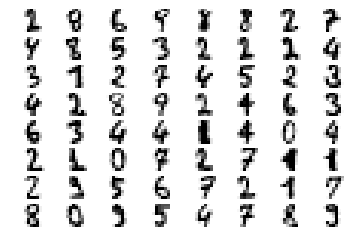

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.49652 stdev: 0.17398
Best fitness: 0.95385 - size: (2, 13) - species 4 - id 65
Average adjusted fitness: 0.422
Mean genetic distance 2.977, standard deviation 0.462
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 1.544 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59599 stdev: 0.18117
Best fitness: 0.98462 - size: (3, 15) - species 1 - id 319
Average adjusted fitness: 0.542
Mean genetic distance 2.987, standard deviation 0.476
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 1.507 sec (1.526 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62154 stdev: 0.18748
Best fitness: 0.98462 - size: (3, 15) - species 24 - id 319
Average adjusted fitness: 0.509
Mean genetic distance 2.937, standard deviation 0.470
Population of 203 members in 29 species
Total extinctio

Total extinctions: 0
Generation time: 1.462 sec (1.361 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70859 stdev: 0.19675
Best fitness: 0.98137 - size: (3, 16) - species 5 - id 898
Average adjusted fitness: 0.478
Mean genetic distance 3.175, standard deviation 0.505
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 1.503 sec (1.385 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.76124 stdev: 0.18552
Best fitness: 0.99068 - size: (6, 21) - species 31 - id 1062
Average adjusted fitness: 0.573
Mean genetic distance 3.218, standard deviation 0.485
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 1.639 sec (1.421 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.74636 stdev: 0.19626
Best fitness: 0.99068 - size: (6, 21) - species 31 - id 1062
Average adjusted fitness: 0.681
Mean genetic distance 3.220, standard deviation 0.493
Population of

Population's average fitness: 0.80736 stdev: 0.19416
Best fitness: 0.99689 - size: (8, 25) - species 10 - id 3303
Average adjusted fitness: 0.721
Mean genetic distance 3.229, standard deviation 0.521
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 1.907 sec (1.759 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.81160 stdev: 0.19123
Best fitness: 0.99689 - size: (8, 25) - species 10 - id 3303
Average adjusted fitness: 0.501
Mean genetic distance 3.211, standard deviation 0.506
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 1.831 sec (1.777 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.81898 stdev: 0.18651
Best fitness: 0.99689 - size: (8, 25) - species 10 - id 3303
Average adjusted fitness: 0.320
Mean genetic distance 3.219, standard deviation 0.511
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 1.875 sec (1.791 average)

 ******

Population's average fitness: 0.77566 stdev: 0.20697
Best fitness: 0.99689 - size: (8, 28) - species 24 - id 6966
Average adjusted fitness: 0.665
Mean genetic distance 3.329, standard deviation 0.591
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 2.133 sec (2.039 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.77789 stdev: 0.20935
Best fitness: 0.99689 - size: (8, 28) - species 24 - id 6966
Average adjusted fitness: 0.689
Mean genetic distance 3.320, standard deviation 0.592
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 2.038 sec (2.052 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.75550 stdev: 0.20989
Best fitness: 0.99689 - size: (9, 30) - species 52 - id 7973
Average adjusted fitness: 0.623
Mean genetic distance 3.238, standard deviation 0.638
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 2.201 sec (2.083 average)

 ******

Mean genetic distance 3.154, standard deviation 0.469
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 1.746 sec (1.984 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71945 stdev: 0.19370
Best fitness: 0.99381 - size: (5, 18) - species 30 - id 669
Average adjusted fitness: 0.571
Mean genetic distance 3.129, standard deviation 0.462
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 1.730 sec (1.952 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72667 stdev: 0.19577
Best fitness: 0.99381 - size: (5, 18) - species 30 - id 669
Average adjusted fitness: 0.577
Mean genetic distance 3.131, standard deviation 0.462
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 1.755 sec (1.930 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.74167 stdev: 0.19638
Best fitness: 0.99381 - size: (5, 18) - species 30 - id 669
Averag

Population's average fitness: 0.73935 stdev: 0.18994
Best fitness: 0.99387 - size: (5, 20) - species 19 - id 1595
Average adjusted fitness: 0.457
Mean genetic distance 3.121, standard deviation 0.466
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 1.944 sec (1.743 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.75965 stdev: 0.18947
Best fitness: 0.99387 - size: (7, 24) - species 29 - id 2157
Average adjusted fitness: 0.646
Mean genetic distance 3.118, standard deviation 0.467
Population of 190 members in 38 species
Total extinctions: 0
Generation time: 1.908 sec (1.774 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.76857 stdev: 0.18898
Best fitness: 0.99387 - size: (7, 24) - species 29 - id 2157
Average adjusted fitness: 0.519
Mean genetic distance 3.168, standard deviation 0.465
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 1.855 sec (1.798 average)

 ******

Mean genetic distance 3.217, standard deviation 0.496
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 1.850 sec (1.842 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.77478 stdev: 0.20389
Best fitness: 0.99385 - size: (6, 18) - species 28 - id 2886
Average adjusted fitness: 0.728
Mean genetic distance 3.272, standard deviation 0.509
Population of 207 members in 25 species
Total extinctions: 0
Generation time: 1.892 sec (1.851 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.75844 stdev: 0.18913
Best fitness: 0.99385 - size: (6, 18) - species 28 - id 2886
Average adjusted fitness: 0.436
Mean genetic distance 3.248, standard deviation 0.494
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 2.014 sec (1.874 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.77857 stdev: 0.18696
Best fitness: 0.99385 - size: (6, 18) - species 28 - id 2886


Generation time: 1.616 sec (1.485 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71016 stdev: 0.20510
Best fitness: 0.99689 - size: (3, 16) - species 24 - id 496
Average adjusted fitness: 0.558
Mean genetic distance 3.081, standard deviation 0.511
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 1.653 sec (1.513 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.72174 stdev: 0.20744
Best fitness: 0.99689 - size: (3, 16) - species 24 - id 496
Average adjusted fitness: 0.674
Mean genetic distance 3.108, standard deviation 0.509
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 1.614 sec (1.528 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.74059 stdev: 0.20616
Best fitness: 0.99689 - size: (3, 16) - species 6 - id 1260
Average adjusted fitness: 0.629
Mean genetic distance 3.122, standard deviation 0.502
Population of 198 members in 27 spe

Population's average fitness: 0.69734 stdev: 0.14755
Best fitness: 0.91331 - size: (6, 20) - species 21 - id 1278
Average adjusted fitness: 0.426
Mean genetic distance 3.132, standard deviation 0.492
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 1.931 sec (2.354 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68356 stdev: 0.15208
Best fitness: 0.91331 - size: (6, 20) - species 21 - id 1278
Average adjusted fitness: 0.373
Mean genetic distance 3.127, standard deviation 0.486
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 2.495 sec (2.386 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69080 stdev: 0.15230
Best fitness: 0.91331 - size: (6, 20) - species 21 - id 1278
Average adjusted fitness: 0.440
Mean genetic distance 3.138, standard deviation 0.479
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 2.137 sec (2.387 average)

 ******

Population's average fitness: 0.74222 stdev: 0.16141
Best fitness: 0.97833 - size: (6, 21) - species 27 - id 3698
Average adjusted fitness: 0.395
Mean genetic distance 3.194, standard deviation 0.575
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 2.800 sec (2.975 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.73256 stdev: 0.17615
Best fitness: 0.97833 - size: (6, 21) - species 27 - id 3698
Average adjusted fitness: 0.478
Mean genetic distance 3.208, standard deviation 0.562
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 2.509 sec (2.987 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.72836 stdev: 0.17164
Best fitness: 0.97833 - size: (6, 21) - species 27 - id 3698
Average adjusted fitness: 0.491
Mean genetic distance 3.213, standard deviation 0.559
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 2.615 sec (2.961 average)

 ******

Population's average fitness: 0.70065 stdev: 0.16244
Best fitness: 0.99071 - size: (6, 21) - species 27 - id 6764
Average adjusted fitness: 0.428
Mean genetic distance 3.268, standard deviation 0.616
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 4.192 sec (3.634 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.68784 stdev: 0.16328
Best fitness: 0.99071 - size: (6, 21) - species 27 - id 6764
Average adjusted fitness: 0.538
Mean genetic distance 3.305, standard deviation 0.609
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 3.938 sec (3.785 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.68306 stdev: 0.16521
Best fitness: 0.99071 - size: (6, 21) - species 27 - id 6764
Average adjusted fitness: 0.456
Mean genetic distance 3.299, standard deviation 0.601
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.105 sec (3.936 average)

 ******

Population's average fitness: 0.74663 stdev: 0.16459
Best fitness: 0.98780 - size: (8, 25) - species 38 - id 2238
Average adjusted fitness: 0.467
Mean genetic distance 3.156, standard deviation 0.491
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 4.007 sec (4.093 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75008 stdev: 0.16586
Best fitness: 0.99085 - size: (9, 27) - species 38 - id 2494
Average adjusted fitness: 0.499
Mean genetic distance 3.164, standard deviation 0.485
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 4.080 sec (4.078 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73731 stdev: 0.18417
Best fitness: 0.99085 - size: (9, 27) - species 38 - id 2494
Average adjusted fitness: 0.607
Mean genetic distance 3.156, standard deviation 0.488
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 4.133 sec (4.099 average)

 ******

Population's average fitness: 0.75855 stdev: 0.18944
Best fitness: 0.99390 - size: (10, 27) - species 23 - id 5412
Average adjusted fitness: 0.543
Mean genetic distance 3.283, standard deviation 0.531
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 4.808 sec (4.603 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.76150 stdev: 0.18708
Best fitness: 0.99390 - size: (11, 33) - species 41 - id 5811
Average adjusted fitness: 0.518
Mean genetic distance 3.280, standard deviation 0.535
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.387 sec (4.599 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.78181 stdev: 0.18002
Best fitness: 0.99390 - size: (11, 33) - species 41 - id 5811
Average adjusted fitness: 0.560
Mean genetic distance 3.277, standard deviation 0.544
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.625 sec (4.594 average)

 ***

Population's average fitness: 0.78662 stdev: 0.18570
Best fitness: 0.99695 - size: (10, 29) - species 23 - id 9752
Average adjusted fitness: 0.483
Mean genetic distance 3.355, standard deviation 0.606
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 5.299 sec (5.122 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.75035 stdev: 0.19797
Best fitness: 0.99695 - size: (10, 29) - species 23 - id 9752
Average adjusted fitness: 0.430
Mean genetic distance 3.384, standard deviation 0.606
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 5.175 sec (5.150 average)
Class1:1 #class1:163
Class2:4 #class2:161

 ****** Running generation 0 ****** 

Population's average fitness: 0.51091 stdev: 0.10604
Best fitness: 0.80864 - size: (2, 13) - species 5 - id 125
Average adjusted fitness: 0.310
Mean genetic distance 2.905, standard deviation 0.462
Population of 200 members in 28 species
Total extinctions: 0
Generation

Population's average fitness: 0.72247 stdev: 0.15980
Best fitness: 0.93519 - size: (8, 21) - species 41 - id 2366
Average adjusted fitness: 0.480
Mean genetic distance 3.244, standard deviation 0.454
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 4.289 sec (4.204 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.73120 stdev: 0.15272
Best fitness: 0.93519 - size: (8, 21) - species 41 - id 2366
Average adjusted fitness: 0.454
Mean genetic distance 3.237, standard deviation 0.474
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 4.442 sec (4.234 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.70765 stdev: 0.16244
Best fitness: 0.93519 - size: (8, 21) - species 41 - id 2366
Average adjusted fitness: 0.428
Mean genetic distance 3.223, standard deviation 0.472
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 4.239 sec (4.219 average)

 ******

Population's average fitness: 0.72821 stdev: 0.16497
Best fitness: 0.95679 - size: (7, 26) - species 36 - id 5662
Average adjusted fitness: 0.477
Mean genetic distance 3.266, standard deviation 0.529
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 4.635 sec (4.646 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.71423 stdev: 0.16503
Best fitness: 0.95679 - size: (7, 26) - species 36 - id 5662
Average adjusted fitness: 0.346
Mean genetic distance 3.254, standard deviation 0.530
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 4.986 sec (4.683 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.72789 stdev: 0.16931
Best fitness: 0.95679 - size: (7, 26) - species 36 - id 5662
Average adjusted fitness: 0.327
Mean genetic distance 3.282, standard deviation 0.530
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 5.118 sec (4.747 average)

 ******

Population's average fitness: 0.60766 stdev: 0.15959
Best fitness: 0.96330 - size: (4, 19) - species 13 - id 684
Average adjusted fitness: 0.457
Mean genetic distance 3.003, standard deviation 0.486
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 3.612 sec (3.350 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63300 stdev: 0.16013
Best fitness: 0.96330 - size: (4, 19) - species 13 - id 684
Average adjusted fitness: 0.392
Mean genetic distance 3.028, standard deviation 0.482
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 3.783 sec (3.437 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66124 stdev: 0.15764
Best fitness: 0.96330 - size: (4, 19) - species 13 - id 684
Average adjusted fitness: 0.344
Mean genetic distance 3.039, standard deviation 0.484
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 3.734 sec (3.486 average)

 ****** Runn

Population's average fitness: 0.72422 stdev: 0.17072
Best fitness: 0.97554 - size: (9, 26) - species 11 - id 2995
Average adjusted fitness: 0.360
Mean genetic distance 3.188, standard deviation 0.523
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 4.335 sec (4.211 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73537 stdev: 0.17736
Best fitness: 0.97554 - size: (9, 26) - species 11 - id 2995
Average adjusted fitness: 0.543
Mean genetic distance 3.156, standard deviation 0.511
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 4.172 sec (4.221 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.74085 stdev: 0.16301
Best fitness: 0.97554 - size: (9, 26) - species 11 - id 2995
Average adjusted fitness: 0.504
Mean genetic distance 3.161, standard deviation 0.521
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 4.171 sec (4.231 average)

 ******

Population's average fitness: 0.72845 stdev: 0.19120
Best fitness: 0.99083 - size: (5, 22) - species 2 - id 7046
Average adjusted fitness: 0.592
Mean genetic distance 3.165, standard deviation 0.529
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 4.676 sec (4.831 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.73964 stdev: 0.17865
Best fitness: 0.99083 - size: (5, 22) - species 2 - id 7046
Average adjusted fitness: 0.313
Mean genetic distance 3.178, standard deviation 0.546
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 4.745 sec (4.840 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.75861 stdev: 0.18317
Best fitness: 0.99083 - size: (5, 22) - species 2 - id 7046
Average adjusted fitness: 0.501
Mean genetic distance 3.174, standard deviation 0.551
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 4.583 sec (4.826 average)

 ****** Ru

Population's average fitness: 0.67539 stdev: 0.16502
Best fitness: 0.98160 - size: (5, 19) - species 17 - id 1343
Average adjusted fitness: 0.564
Mean genetic distance 3.165, standard deviation 0.483
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 3.916 sec (3.610 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67762 stdev: 0.16955
Best fitness: 0.98160 - size: (5, 19) - species 17 - id 1343
Average adjusted fitness: 0.551
Mean genetic distance 3.169, standard deviation 0.483
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 4.006 sec (3.649 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69656 stdev: 0.15857
Best fitness: 0.98160 - size: (5, 19) - species 17 - id 1343
Average adjusted fitness: 0.352
Mean genetic distance 3.152, standard deviation 0.500
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 3.934 sec (3.760 average)

 ****** 

Population's average fitness: 0.74705 stdev: 0.17300
Best fitness: 0.99693 - size: (7, 23) - species 38 - id 3681
Average adjusted fitness: 0.514
Mean genetic distance 3.223, standard deviation 0.521
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 4.571 sec (4.434 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.76465 stdev: 0.17341
Best fitness: 0.99693 - size: (7, 23) - species 38 - id 3681
Average adjusted fitness: 0.645
Mean genetic distance 3.227, standard deviation 0.528
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.530 sec (4.460 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.76419 stdev: 0.17675
Best fitness: 0.99693 - size: (7, 23) - species 38 - id 3681
Average adjusted fitness: 0.431
Mean genetic distance 3.237, standard deviation 0.536
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 4.545 sec (4.497 average)

 ******

Population's average fitness: 0.71046 stdev: 0.18292
Best fitness: 0.99693 - size: (8, 25) - species 38 - id 7881
Average adjusted fitness: 0.509
Mean genetic distance 3.164, standard deviation 0.631
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 5.015 sec (5.016 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.71835 stdev: 0.19148
Best fitness: 0.99693 - size: (8, 25) - species 38 - id 7881
Average adjusted fitness: 0.643
Mean genetic distance 3.179, standard deviation 0.581
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 5.082 sec (5.020 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.74206 stdev: 0.18339
Best fitness: 0.99693 - size: (8, 25) - species 38 - id 7881
Average adjusted fitness: 0.521
Mean genetic distance 3.212, standard deviation 0.558
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 5.208 sec (5.044 average)

 ******

Population's average fitness: 0.72147 stdev: 0.15934
Best fitness: 0.97214 - size: (5, 21) - species 3 - id 1829
Average adjusted fitness: 0.305
Mean genetic distance 3.217, standard deviation 0.465
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 3.967 sec (3.950 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71083 stdev: 0.17436
Best fitness: 0.97214 - size: (5, 21) - species 3 - id 1829
Average adjusted fitness: 0.559
Mean genetic distance 3.183, standard deviation 0.465
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 3.855 sec (3.969 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70829 stdev: 0.17216
Best fitness: 0.97214 - size: (6, 15) - species 33 - id 2184
Average adjusted fitness: 0.466
Mean genetic distance 3.187, standard deviation 0.472
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 4.287 sec (4.020 average)

 ****** R

Population's average fitness: 0.76539 stdev: 0.17635
Best fitness: 0.99381 - size: (8, 19) - species 33 - id 3702
Average adjusted fitness: 0.636
Mean genetic distance 3.293, standard deviation 0.491
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 4.378 sec (4.286 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.76996 stdev: 0.17291
Best fitness: 0.99381 - size: (8, 19) - species 33 - id 3702
Average adjusted fitness: 0.382
Mean genetic distance 3.281, standard deviation 0.488
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 4.348 sec (4.310 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.76121 stdev: 0.17754
Best fitness: 0.99381 - size: (11, 34) - species 11 - id 5083
Average adjusted fitness: 0.409
Mean genetic distance 3.277, standard deviation 0.498
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 4.913 sec (4.368 average)

 *****

Population's average fitness: 0.75377 stdev: 0.18518
Best fitness: 0.99690 - size: (12, 36) - species 11 - id 6494
Average adjusted fitness: 0.513
Mean genetic distance 3.301, standard deviation 0.537
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 4.605 sec (4.736 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.73804 stdev: 0.18125
Best fitness: 0.99690 - size: (12, 36) - species 11 - id 6494
Average adjusted fitness: 0.327
Mean genetic distance 3.296, standard deviation 0.563
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 4.875 sec (4.749 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.74482 stdev: 0.17591
Best fitness: 0.99690 - size: (12, 36) - species 11 - id 6494
Average adjusted fitness: 0.420
Mean genetic distance 3.301, standard deviation 0.576
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 4.698 sec (4.742 average)

 ***

Population's average fitness: 0.67572 stdev: 0.13687
Best fitness: 0.89062 - size: (6, 19) - species 16 - id 1306
Average adjusted fitness: 0.305
Mean genetic distance 3.216, standard deviation 0.468
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 4.693 sec (4.653 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65942 stdev: 0.14435
Best fitness: 0.89062 - size: (6, 19) - species 16 - id 1306
Average adjusted fitness: 0.392
Mean genetic distance 3.200, standard deviation 0.462
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 4.845 sec (4.682 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.67949 stdev: 0.13851
Best fitness: 0.89375 - size: (6, 21) - species 30 - id 2715
Average adjusted fitness: 0.510
Mean genetic distance 3.188, standard deviation 0.467
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 4.885 sec (4.719 average)

 ******

Population's average fitness: 0.70780 stdev: 0.14923
Best fitness: 0.93125 - size: (7, 22) - species 30 - id 3734
Average adjusted fitness: 0.367
Mean genetic distance 3.274, standard deviation 0.516
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 4.996 sec (4.785 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.69424 stdev: 0.15221
Best fitness: 0.93125 - size: (7, 22) - species 30 - id 3734
Average adjusted fitness: 0.320
Mean genetic distance 3.282, standard deviation 0.526
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 4.817 sec (4.794 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.71364 stdev: 0.15854
Best fitness: 0.93125 - size: (7, 22) - species 30 - id 3734
Average adjusted fitness: 0.361
Mean genetic distance 3.266, standard deviation 0.541
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 4.729 sec (4.820 average)

 ******

Population's average fitness: 0.68142 stdev: 0.16211
Best fitness: 0.93125 - size: (7, 22) - species 30 - id 3734
Average adjusted fitness: 0.362
Mean genetic distance 3.273, standard deviation 0.576
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 5.458 sec (5.317 average)
Class1:1 #class1:163
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.50371 stdev: 0.12995
Best fitness: 0.85846 - size: (2, 13) - species 3 - id 27
Average adjusted fitness: 0.409
Mean genetic distance 2.976, standard deviation 0.479
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 3.165 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56462 stdev: 0.12576
Best fitness: 0.90154 - size: (3, 13) - species 9 - id 358
Average adjusted fitness: 0.329
Mean genetic distance 3.079, standard deviation 0.487
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 3.286 sec (3.22

Population's average fitness: 0.73946 stdev: 0.15097
Best fitness: 0.95692 - size: (7, 24) - species 27 - id 2899
Average adjusted fitness: 0.481
Mean genetic distance 3.236, standard deviation 0.508
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 4.735 sec (4.424 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.74050 stdev: 0.14708
Best fitness: 0.95692 - size: (7, 24) - species 27 - id 2899
Average adjusted fitness: 0.450
Mean genetic distance 3.266, standard deviation 0.494
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 4.615 sec (4.466 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.73511 stdev: 0.15218
Best fitness: 0.95692 - size: (7, 24) - species 27 - id 2899
Average adjusted fitness: 0.440
Mean genetic distance 3.274, standard deviation 0.512
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 4.830 sec (4.471 average)

 ******

Population's average fitness: 0.73672 stdev: 0.16168
Best fitness: 0.97538 - size: (8, 27) - species 52 - id 5458
Average adjusted fitness: 0.514
Mean genetic distance 3.326, standard deviation 0.528
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 5.240 sec (5.400 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.73478 stdev: 0.15223
Best fitness: 0.97538 - size: (8, 27) - species 52 - id 5458
Average adjusted fitness: 0.498
Mean genetic distance 3.297, standard deviation 0.544
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 5.226 sec (5.364 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.72464 stdev: 0.16095
Best fitness: 0.97538 - size: (8, 27) - species 52 - id 5458
Average adjusted fitness: 0.450
Mean genetic distance 3.295, standard deviation 0.551
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 5.227 sec (5.325 average)

 ******

Population's average fitness: 0.61474 stdev: 0.13235
Best fitness: 0.91077 - size: (4, 17) - species 26 - id 657
Average adjusted fitness: 0.381
Mean genetic distance 3.049, standard deviation 0.479
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 4.041 sec (3.737 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64296 stdev: 0.14204
Best fitness: 0.91077 - size: (6, 20) - species 2 - id 894
Average adjusted fitness: 0.419
Mean genetic distance 3.052, standard deviation 0.486
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 4.064 sec (3.791 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66180 stdev: 0.14110
Best fitness: 0.92308 - size: (5, 20) - species 25 - id 1056
Average adjusted fitness: 0.389
Mean genetic distance 3.086, standard deviation 0.469
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 4.106 sec (3.836 average)

 ****** Runn

Population's average fitness: 0.74650 stdev: 0.15822
Best fitness: 0.95692 - size: (7, 23) - species 43 - id 3092
Average adjusted fitness: 0.605
Mean genetic distance 3.349, standard deviation 0.496
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 4.896 sec (4.685 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.75341 stdev: 0.16342
Best fitness: 0.95692 - size: (7, 23) - species 43 - id 3092
Average adjusted fitness: 0.549
Mean genetic distance 3.340, standard deviation 0.494
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 5.059 sec (4.754 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.76578 stdev: 0.15865
Best fitness: 0.95692 - size: (7, 23) - species 43 - id 3092
Average adjusted fitness: 0.363
Mean genetic distance 3.376, standard deviation 0.481
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 5.157 sec (4.829 average)

 ******

Population's average fitness: 0.74302 stdev: 0.17581
Best fitness: 0.97231 - size: (10, 28) - species 41 - id 6115
Average adjusted fitness: 0.565
Mean genetic distance 3.352, standard deviation 0.560
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 5.768 sec (5.312 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.72682 stdev: 0.17614
Best fitness: 0.97231 - size: (10, 28) - species 41 - id 6115
Average adjusted fitness: 0.397
Mean genetic distance 3.337, standard deviation 0.553
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 5.623 sec (5.367 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.75227 stdev: 0.17448
Best fitness: 0.97231 - size: (10, 28) - species 41 - id 6115
Average adjusted fitness: 0.413
Mean genetic distance 3.319, standard deviation 0.567
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 5.384 sec (5.401 average)

 ***

Population's average fitness: 0.74876 stdev: 0.18911
Best fitness: 0.98754 - size: (4, 15) - species 27 - id 1556
Average adjusted fitness: 0.618
Mean genetic distance 3.144, standard deviation 0.533
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 4.019 sec (3.705 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.74960 stdev: 0.17709
Best fitness: 0.98754 - size: (4, 15) - species 27 - id 1556
Average adjusted fitness: 0.562
Mean genetic distance 3.131, standard deviation 0.543
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 3.975 sec (3.793 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.76204 stdev: 0.16783
Best fitness: 0.98754 - size: (4, 15) - species 27 - id 1556
Average adjusted fitness: 0.361
Mean genetic distance 3.118, standard deviation 0.550
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 4.300 sec (3.877 average)

 ******

Mean genetic distance 3.162, standard deviation 0.461
Population of 208 members in 43 species
Total extinctions: 0
Generation time: 4.159 sec (4.002 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69881 stdev: 0.16108
Best fitness: 0.95988 - size: (7, 21) - species 38 - id 1667
Average adjusted fitness: 0.417
Mean genetic distance 3.160, standard deviation 0.453
Population of 207 members in 43 species
Total extinctions: 0
Generation time: 4.475 sec (4.101 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71073 stdev: 0.17210
Best fitness: 0.95988 - size: (7, 21) - species 38 - id 1667
Average adjusted fitness: 0.457
Mean genetic distance 3.175, standard deviation 0.453
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 4.572 sec (4.178 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71744 stdev: 0.16742
Best fitness: 0.95988 - size: (7, 21) - species 38 - id 1667


Mean genetic distance 3.257, standard deviation 0.521
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.794 sec (4.713 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.77971 stdev: 0.16428
Best fitness: 0.99383 - size: (8, 25) - species 38 - id 4544
Average adjusted fitness: 0.349
Mean genetic distance 3.260, standard deviation 0.514
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 4.918 sec (4.754 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.75945 stdev: 0.18094
Best fitness: 0.99383 - size: (8, 25) - species 38 - id 4544
Average adjusted fitness: 0.616
Mean genetic distance 3.281, standard deviation 0.517
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 4.892 sec (4.784 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.76383 stdev: 0.17235
Best fitness: 0.99383 - size: (8, 25) - species 38 - id 4544


Population's average fitness: 0.72742 stdev: 0.17937
Best fitness: 0.96594 - size: (3, 16) - species 34 - id 938
Average adjusted fitness: 0.405
Mean genetic distance 3.147, standard deviation 0.467
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 4.085 sec (3.736 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72278 stdev: 0.19339
Best fitness: 0.98452 - size: (5, 16) - species 33 - id 1322
Average adjusted fitness: 0.592
Mean genetic distance 3.167, standard deviation 0.463
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 4.130 sec (3.780 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.72571 stdev: 0.17957
Best fitness: 0.98452 - size: (5, 16) - species 33 - id 1322
Average adjusted fitness: 0.507
Mean genetic distance 3.152, standard deviation 0.472
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 4.249 sec (3.827 average)

 ****** Ru

Population's average fitness: 0.79654 stdev: 0.18550
Best fitness: 0.99690 - size: (6, 20) - species 14 - id 3895
Average adjusted fitness: 0.578
Mean genetic distance 3.292, standard deviation 0.494
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 4.702 sec (4.600 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.80400 stdev: 0.17548
Best fitness: 0.99690 - size: (6, 20) - species 14 - id 3895
Average adjusted fitness: 0.343
Mean genetic distance 3.297, standard deviation 0.496
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 4.552 sec (4.597 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.77553 stdev: 0.18512
Best fitness: 0.99690 - size: (6, 20) - species 14 - id 3895
Average adjusted fitness: 0.399
Mean genetic distance 3.300, standard deviation 0.498
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 4.653 sec (4.600 average)

 ******

Population's average fitness: 0.74313 stdev: 0.20986
Best fitness: 0.99690 - size: (6, 20) - species 14 - id 3895
Average adjusted fitness: 0.675
Mean genetic distance 3.258, standard deviation 0.549
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 5.440 sec (5.212 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.73615 stdev: 0.20212
Best fitness: 0.99690 - size: (6, 20) - species 14 - id 3895
Average adjusted fitness: 0.566
Mean genetic distance 3.239, standard deviation 0.571
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 5.387 sec (5.230 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.73413 stdev: 0.20787
Best fitness: 0.99690 - size: (6, 20) - species 14 - id 3895
Average adjusted fitness: 0.581
Mean genetic distance 3.241, standard deviation 0.563
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.164 sec (5.233 average)

 ******

Mean genetic distance 3.115, standard deviation 0.470
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 4.516 sec (4.234 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73803 stdev: 0.17733
Best fitness: 0.99375 - size: (6, 23) - species 15 - id 2056
Average adjusted fitness: 0.579
Mean genetic distance 3.109, standard deviation 0.476
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 4.434 sec (4.288 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.74923 stdev: 0.16982
Best fitness: 0.99375 - size: (6, 23) - species 15 - id 2056
Average adjusted fitness: 0.477
Mean genetic distance 3.102, standard deviation 0.478
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 4.387 sec (4.329 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.74902 stdev: 0.18763
Best fitness: 0.99375 - size: (6, 23) - species 15 - id 2056


Mean genetic distance 3.180, standard deviation 0.513
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 5.210 sec (4.940 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.77219 stdev: 0.17291
Best fitness: 0.99687 - size: (6, 24) - species 15 - id 2767
Average adjusted fitness: 0.432
Mean genetic distance 3.173, standard deviation 0.518
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 5.104 sec (4.942 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.77345 stdev: 0.16892
Best fitness: 0.99687 - size: (6, 24) - species 15 - id 2767
Average adjusted fitness: 0.496
Mean genetic distance 3.169, standard deviation 0.528
Population of 191 members in 24 species
Total extinctions: 0
Generation time: 5.352 sec (4.985 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.76972 stdev: 0.17131
Best fitness: 0.99687 - size: (6, 24) - species 15 - id 2767


Population's average fitness: 0.66869 stdev: 0.13795
Best fitness: 0.93691 - size: (5, 18) - species 27 - id 1137
Average adjusted fitness: 0.429
Mean genetic distance 3.125, standard deviation 0.455
Population of 201 members in 50 species
Total extinctions: 0
Generation time: 4.261 sec (4.051 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66984 stdev: 0.14759
Best fitness: 0.93691 - size: (5, 18) - species 27 - id 1137
Average adjusted fitness: 0.429
Mean genetic distance 3.148, standard deviation 0.464
Population of 205 members in 50 species
Total extinctions: 0
Generation time: 4.201 sec (4.079 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68822 stdev: 0.13967
Best fitness: 0.93691 - size: (5, 18) - species 27 - id 1137
Average adjusted fitness: 0.448
Mean genetic distance 3.153, standard deviation 0.455
Population of 204 members in 50 species
Total extinctions: 0
Generation time: 4.235 sec (4.118 average)

 ******

Population's average fitness: 0.69833 stdev: 0.15223
Best fitness: 0.95899 - size: (5, 18) - species 27 - id 2749
Average adjusted fitness: 0.387
Mean genetic distance 3.211, standard deviation 0.515
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 4.574 sec (4.439 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.71252 stdev: 0.15072
Best fitness: 0.95899 - size: (5, 18) - species 27 - id 2749
Average adjusted fitness: 0.450
Mean genetic distance 3.203, standard deviation 0.527
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 4.446 sec (4.455 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.70488 stdev: 0.14763
Best fitness: 0.95899 - size: (5, 18) - species 27 - id 2749
Average adjusted fitness: 0.401
Mean genetic distance 3.220, standard deviation 0.525
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 4.547 sec (4.469 average)

 ******

Population's average fitness: 0.71277 stdev: 0.16437
Best fitness: 0.95899 - size: (5, 22) - species 19 - id 7754
Average adjusted fitness: 0.459
Mean genetic distance 3.176, standard deviation 0.573
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 5.096 sec (5.086 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.70461 stdev: 0.15813
Best fitness: 0.95899 - size: (5, 22) - species 19 - id 7754
Average adjusted fitness: 0.373
Mean genetic distance 3.205, standard deviation 0.570
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 5.195 sec (5.106 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.69726 stdev: 0.15960
Best fitness: 0.95899 - size: (5, 22) - species 19 - id 7754
Average adjusted fitness: 0.350
Mean genetic distance 3.182, standard deviation 0.590
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 5.199 sec (5.125 average)

 ******

Population's average fitness: 0.73773 stdev: 0.16560
Best fitness: 0.97826 - size: (3, 18) - species 6 - id 2270
Average adjusted fitness: 0.459
Mean genetic distance 3.211, standard deviation 0.463
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 4.535 sec (4.234 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.76355 stdev: 0.16278
Best fitness: 0.97826 - size: (3, 18) - species 6 - id 2270
Average adjusted fitness: 0.563
Mean genetic distance 3.206, standard deviation 0.473
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 4.194 sec (4.254 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75475 stdev: 0.16479
Best fitness: 0.97826 - size: (3, 18) - species 6 - id 2270
Average adjusted fitness: 0.437
Mean genetic distance 3.201, standard deviation 0.472
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 4.248 sec (4.277 average)

 ****** Ru

Population's average fitness: 0.79021 stdev: 0.15730
Best fitness: 0.99068 - size: (9, 28) - species 31 - id 5675
Average adjusted fitness: 0.512
Mean genetic distance 3.300, standard deviation 0.545
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 5.076 sec (4.857 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.75217 stdev: 0.17742
Best fitness: 0.99068 - size: (9, 28) - species 31 - id 5675
Average adjusted fitness: 0.474
Mean genetic distance 3.303, standard deviation 0.577
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 5.030 sec (4.893 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.78377 stdev: 0.16361
Best fitness: 0.99068 - size: (9, 28) - species 31 - id 5675
Average adjusted fitness: 0.494
Mean genetic distance 3.309, standard deviation 0.565
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.065 sec (4.939 average)

 ******

Mean genetic distance 3.121, standard deviation 0.495
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 4.109 sec (3.781 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.74829 stdev: 0.20075
Best fitness: 0.99080 - size: (6, 22) - species 28 - id 1084
Average adjusted fitness: 0.617
Mean genetic distance 3.144, standard deviation 0.494
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 4.256 sec (3.841 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.79208 stdev: 0.17996
Best fitness: 0.99080 - size: (4, 16) - species 14 - id 1345
Average adjusted fitness: 0.454
Mean genetic distance 3.144, standard deviation 0.502
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 4.116 sec (3.871 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.77667 stdev: 0.19738
Best fitness: 0.99080 - size: (4, 16) - species 14 - id 1345
Ave

Mean genetic distance 3.055, standard deviation 0.502
Population of 208 members in 24 species
Total extinctions: 0
Generation time: 4.909 sec (4.670 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.79218 stdev: 0.19919
Best fitness: 0.99387 - size: (7, 24) - species 16 - id 4187
Average adjusted fitness: 0.672
Mean genetic distance 3.054, standard deviation 0.512
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 4.966 sec (4.713 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.78453 stdev: 0.21103
Best fitness: 0.99387 - size: (12, 29) - species 24 - id 4576
Average adjusted fitness: 0.705
Mean genetic distance 3.073, standard deviation 0.504
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 4.910 sec (4.759 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.79053 stdev: 0.20310
Best fitness: 0.99387 - size: (12, 29) - species 24 - id 457

Mean genetic distance 3.134, standard deviation 0.593
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 5.523 sec (5.119 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.77838 stdev: 0.21234
Best fitness: 0.99693 - size: (8, 26) - species 38 - id 7707
Average adjusted fitness: 0.759
Mean genetic distance 3.132, standard deviation 0.568
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 5.169 sec (5.150 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.79703 stdev: 0.19910
Best fitness: 0.99693 - size: (8, 26) - species 38 - id 7707
Average adjusted fitness: 0.627
Mean genetic distance 3.140, standard deviation 0.578
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 5.110 sec (5.181 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.78849 stdev: 0.21013
Best fitness: 0.99693 - size: (8, 26) - species 38 - id 7707


Population's average fitness: 0.72977 stdev: 0.17475
Best fitness: 0.98784 - size: (4, 20) - species 13 - id 1650
Average adjusted fitness: 0.448
Mean genetic distance 3.150, standard deviation 0.460
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 4.387 sec (4.137 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.74530 stdev: 0.16024
Best fitness: 0.98784 - size: (4, 20) - species 13 - id 1650
Average adjusted fitness: 0.452
Mean genetic distance 3.154, standard deviation 0.460
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 4.436 sec (4.188 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73093 stdev: 0.17919
Best fitness: 0.98784 - size: (4, 20) - species 13 - id 1650
Average adjusted fitness: 0.469
Mean genetic distance 3.182, standard deviation 0.456
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 4.559 sec (4.245 average)

 ******

Population's average fitness: 0.79833 stdev: 0.16892
Best fitness: 0.98784 - size: (8, 23) - species 36 - id 4291
Average adjusted fitness: 0.387
Mean genetic distance 3.282, standard deviation 0.553
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 4.898 sec (4.898 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.76435 stdev: 0.19188
Best fitness: 0.98784 - size: (8, 23) - species 36 - id 4291
Average adjusted fitness: 0.507
Mean genetic distance 3.281, standard deviation 0.557
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 5.049 sec (4.933 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.76737 stdev: 0.19219
Best fitness: 0.98784 - size: (8, 23) - species 36 - id 4291
Average adjusted fitness: 0.473
Mean genetic distance 3.290, standard deviation 0.557
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 4.889 sec (4.936 average)

 ******

Population's average fitness: 0.78145 stdev: 0.18723
Best fitness: 0.99088 - size: (11, 28) - species 36 - id 7427
Average adjusted fitness: 0.631
Mean genetic distance 3.175, standard deviation 0.607
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 4.894 sec (4.988 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.81215 stdev: 0.15726
Best fitness: 0.99088 - size: (11, 28) - species 36 - id 7427
Average adjusted fitness: 0.489
Mean genetic distance 3.157, standard deviation 0.611
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 4.982 sec (4.985 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.76970 stdev: 0.17891
Best fitness: 0.99088 - size: (11, 28) - species 36 - id 7427
Average adjusted fitness: 0.622
Mean genetic distance 3.208, standard deviation 0.591
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 5.098 sec (4.975 average)

 ***

Population's average fitness: 0.79361 stdev: 0.20272
Best fitness: 0.99695 - size: (5, 16) - species 14 - id 2380
Average adjusted fitness: 0.750
Mean genetic distance 3.235, standard deviation 0.507
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 4.429 sec (4.305 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.79815 stdev: 0.19340
Best fitness: 0.99695 - size: (5, 16) - species 14 - id 2380
Average adjusted fitness: 0.565
Mean genetic distance 3.272, standard deviation 0.508
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 4.430 sec (4.315 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.79968 stdev: 0.20397
Best fitness: 0.99695 - size: (5, 16) - species 14 - id 2380
Average adjusted fitness: 0.732
Mean genetic distance 3.258, standard deviation 0.510
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 4.419 sec (4.337 average)

 ******

Mean genetic distance 3.103, standard deviation 0.512
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.123 sec (3.702 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72028 stdev: 0.17753
Best fitness: 0.98769 - size: (5, 19) - species 4 - id 1433
Average adjusted fitness: 0.347
Mean genetic distance 3.088, standard deviation 0.507
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 4.094 sec (3.745 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.73180 stdev: 0.18139
Best fitness: 0.98769 - size: (5, 19) - species 4 - id 1433
Average adjusted fitness: 0.491
Mean genetic distance 3.092, standard deviation 0.508
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.230 sec (3.794 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72257 stdev: 0.18973
Best fitness: 0.98769 - size: (5, 19) - species 4 - id 1433
Avera

Population's average fitness: 0.68180 stdev: 0.14231
Best fitness: 0.93789 - size: (3, 14) - species 1 - id 1502
Average adjusted fitness: 0.310
Mean genetic distance 3.198, standard deviation 0.497
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 4.174 sec (3.807 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69202 stdev: 0.14218
Best fitness: 0.95342 - size: (4, 16) - species 37 - id 1630
Average adjusted fitness: 0.353
Mean genetic distance 3.217, standard deviation 0.486
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 4.226 sec (3.913 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67969 stdev: 0.15404
Best fitness: 0.95342 - size: (4, 16) - species 37 - id 1630
Average adjusted fitness: 0.375
Mean genetic distance 3.217, standard deviation 0.484
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 4.343 sec (4.014 average)

 ****** 

Population's average fitness: 0.73610 stdev: 0.16490
Best fitness: 0.96273 - size: (9, 22) - species 1 - id 3563
Average adjusted fitness: 0.639
Mean genetic distance 3.309, standard deviation 0.545
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 4.736 sec (4.654 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.72999 stdev: 0.16324
Best fitness: 0.96273 - size: (9, 22) - species 1 - id 3563
Average adjusted fitness: 0.386
Mean genetic distance 3.304, standard deviation 0.552
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 4.630 sec (4.645 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.73707 stdev: 0.15858
Best fitness: 0.96273 - size: (9, 22) - species 1 - id 3563
Average adjusted fitness: 0.354
Mean genetic distance 3.321, standard deviation 0.541
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 4.738 sec (4.645 average)

 ****** Ru

Population's average fitness: 0.73393 stdev: 0.16592
Best fitness: 0.96894 - size: (10, 26) - species 1 - id 6863
Average adjusted fitness: 0.272
Mean genetic distance 3.156, standard deviation 0.586
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 5.455 sec (5.376 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.73002 stdev: 0.16773
Best fitness: 0.96894 - size: (10, 26) - species 1 - id 6863
Average adjusted fitness: 0.357
Mean genetic distance 3.119, standard deviation 0.587
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 5.459 sec (5.396 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.73835 stdev: 0.16752
Best fitness: 0.96894 - size: (10, 26) - species 1 - id 6863
Average adjusted fitness: 0.422
Mean genetic distance 3.095, standard deviation 0.587
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 5.621 sec (5.424 average)

 ******

Population's average fitness: 0.68310 stdev: 0.14912
Best fitness: 0.96330 - size: (6, 20) - species 7 - id 1936
Average adjusted fitness: 0.453
Mean genetic distance 3.194, standard deviation 0.476
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 4.277 sec (4.211 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.67675 stdev: 0.15014
Best fitness: 0.96330 - size: (6, 20) - species 7 - id 1936
Average adjusted fitness: 0.420
Mean genetic distance 3.181, standard deviation 0.475
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 4.381 sec (4.242 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68306 stdev: 0.14760
Best fitness: 0.96330 - size: (6, 20) - species 7 - id 1936
Average adjusted fitness: 0.390
Mean genetic distance 3.168, standard deviation 0.488
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 4.260 sec (4.237 average)

 ****** Ru

Population's average fitness: 0.72381 stdev: 0.14895
Best fitness: 0.97859 - size: (7, 22) - species 7 - id 3348
Average adjusted fitness: 0.332
Mean genetic distance 3.218, standard deviation 0.540
Population of 205 members in 23 species
Total extinctions: 0
Generation time: 5.007 sec (4.856 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.70745 stdev: 0.15535
Best fitness: 0.97859 - size: (7, 22) - species 7 - id 3348
Average adjusted fitness: 0.254
Mean genetic distance 3.184, standard deviation 0.574
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.844 sec (4.843 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.70281 stdev: 0.16148
Best fitness: 0.97859 - size: (7, 22) - species 7 - id 3348
Average adjusted fitness: 0.406
Mean genetic distance 3.216, standard deviation 0.573
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.688 sec (4.824 average)

 ****** Ru

Population's average fitness: 0.77119 stdev: 0.15822
Best fitness: 0.98165 - size: (6, 20) - species 49 - id 7013
Average adjusted fitness: 0.376
Mean genetic distance 3.111, standard deviation 0.621
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 4.587 sec (4.880 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.74231 stdev: 0.16912
Best fitness: 0.98165 - size: (6, 20) - species 49 - id 7013
Average adjusted fitness: 0.459
Mean genetic distance 3.079, standard deviation 0.589
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 4.486 sec (4.840 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.75119 stdev: 0.16760
Best fitness: 0.98165 - size: (6, 20) - species 49 - id 7013
Average adjusted fitness: 0.305
Mean genetic distance 3.069, standard deviation 0.572
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 4.480 sec (4.791 average)

 ******

Population's average fitness: 0.78389 stdev: 0.19388
Best fitness: 0.98769 - size: (6, 20) - species 36 - id 935
Average adjusted fitness: 0.621
Mean genetic distance 3.280, standard deviation 0.504
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 4.278 sec (4.370 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.79709 stdev: 0.18841
Best fitness: 0.98769 - size: (6, 20) - species 36 - id 935
Average adjusted fitness: 0.531
Mean genetic distance 3.320, standard deviation 0.478
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 4.545 sec (4.405 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.77774 stdev: 0.18782
Best fitness: 0.98769 - size: (6, 20) - species 36 - id 935
Average adjusted fitness: 0.581
Mean genetic distance 3.313, standard deviation 0.484
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 4.575 sec (4.421 average)

 ****** Ru

Population's average fitness: 0.81074 stdev: 0.16945
Best fitness: 0.99077 - size: (7, 25) - species 38 - id 5459
Average adjusted fitness: 0.476
Mean genetic distance 3.254, standard deviation 0.535
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 5.008 sec (4.786 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.79855 stdev: 0.17076
Best fitness: 0.99077 - size: (7, 25) - species 38 - id 5459
Average adjusted fitness: 0.368
Mean genetic distance 3.244, standard deviation 0.546
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 4.855 sec (4.786 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.79638 stdev: 0.17731
Best fitness: 0.99077 - size: (7, 25) - species 38 - id 5459
Average adjusted fitness: 0.534
Mean genetic distance 3.249, standard deviation 0.541
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 4.951 sec (4.823 average)

 ******

Population's average fitness: 0.48907 stdev: 0.13805
Best fitness: 0.96296 - size: (2, 13) - species 1 - id 48
Average adjusted fitness: 0.445
Mean genetic distance 2.911, standard deviation 0.454
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 3.263 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58471 stdev: 0.15007
Best fitness: 0.97531 - size: (3, 14) - species 27 - id 380
Average adjusted fitness: 0.325
Mean genetic distance 2.999, standard deviation 0.485
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 3.484 sec (3.374 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62180 stdev: 0.16267
Best fitness: 0.97531 - size: (3, 14) - species 27 - id 380
Average adjusted fitness: 0.471
Mean genetic distance 2.971, standard deviation 0.470
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 3.664 sec (3.470 average)

 ****** Running generation 3 *

Population's average fitness: 0.72866 stdev: 0.19076
Best fitness: 0.98148 - size: (3, 14) - species 27 - id 685
Average adjusted fitness: 0.514
Mean genetic distance 3.239, standard deviation 0.515
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 4.554 sec (4.346 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.73645 stdev: 0.18400
Best fitness: 0.98148 - size: (3, 14) - species 27 - id 685
Average adjusted fitness: 0.591
Mean genetic distance 3.237, standard deviation 0.524
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.588 sec (4.378 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.73373 stdev: 0.18993
Best fitness: 0.98148 - size: (3, 14) - species 27 - id 685
Average adjusted fitness: 0.564
Mean genetic distance 3.224, standard deviation 0.529
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 4.521 sec (4.385 average)

 ****** Ru

Population's average fitness: 0.74443 stdev: 0.18904
Best fitness: 0.98765 - size: (9, 25) - species 20 - id 6477
Average adjusted fitness: 0.604
Mean genetic distance 3.218, standard deviation 0.594
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 5.419 sec (5.123 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.75880 stdev: 0.18014
Best fitness: 0.98765 - size: (9, 25) - species 20 - id 6477
Average adjusted fitness: 0.343
Mean genetic distance 3.258, standard deviation 0.613
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 5.390 sec (5.166 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.74529 stdev: 0.18545
Best fitness: 0.98765 - size: (9, 25) - species 20 - id 6477
Average adjusted fitness: 0.407
Mean genetic distance 3.290, standard deviation 0.621
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 5.125 sec (5.167 average)

 ******

Population's average fitness: 0.64409 stdev: 0.15050
Best fitness: 0.92835 - size: (4, 17) - species 3 - id 676
Average adjusted fitness: 0.442
Mean genetic distance 3.123, standard deviation 0.515
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 3.993 sec (3.644 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65498 stdev: 0.16609
Best fitness: 0.93146 - size: (6, 21) - species 5 - id 1121
Average adjusted fitness: 0.570
Mean genetic distance 3.150, standard deviation 0.516
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 3.901 sec (3.681 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67039 stdev: 0.16351
Best fitness: 0.93146 - size: (6, 21) - species 5 - id 1121
Average adjusted fitness: 0.490
Mean genetic distance 3.160, standard deviation 0.526
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 4.181 sec (3.743 average)

 ****** Runni

Population's average fitness: 0.74383 stdev: 0.16993
Best fitness: 0.95950 - size: (8, 24) - species 18 - id 4294
Average adjusted fitness: 0.595
Mean genetic distance 3.298, standard deviation 0.498
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 4.086 sec (3.983 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.76004 stdev: 0.16662
Best fitness: 0.95950 - size: (11, 31) - species 32 - id 4374
Average adjusted fitness: 0.452
Mean genetic distance 3.277, standard deviation 0.502
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 3.942 sec (3.997 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.74357 stdev: 0.17891
Best fitness: 0.95950 - size: (11, 31) - species 32 - id 4374
Average adjusted fitness: 0.452
Mean genetic distance 3.243, standard deviation 0.510
Population of 191 members in 24 species
Total extinctions: 0
Generation time: 3.992 sec (4.015 average)

 ****

Population's average fitness: 0.76274 stdev: 0.17540
Best fitness: 0.97819 - size: (11, 30) - species 48 - id 6586
Average adjusted fitness: 0.593
Mean genetic distance 3.198, standard deviation 0.556
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.823 sec (4.543 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.76540 stdev: 0.17062
Best fitness: 0.97819 - size: (11, 30) - species 48 - id 6586
Average adjusted fitness: 0.446
Mean genetic distance 3.213, standard deviation 0.563
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 4.698 sec (4.589 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.77789 stdev: 0.15893
Best fitness: 0.97819 - size: (11, 30) - species 48 - id 6586
Average adjusted fitness: 0.368
Mean genetic distance 3.209, standard deviation 0.555
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 4.946 sec (4.646 average)

 ***

Population's average fitness: 0.71303 stdev: 0.16139
Best fitness: 0.97484 - size: (5, 16) - species 34 - id 820
Average adjusted fitness: 0.319
Mean genetic distance 3.088, standard deviation 0.504
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 3.371 sec (3.288 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72622 stdev: 0.16411
Best fitness: 0.97484 - size: (5, 16) - species 34 - id 820
Average adjusted fitness: 0.363
Mean genetic distance 3.117, standard deviation 0.502
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 3.447 sec (3.340 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72973 stdev: 0.17434
Best fitness: 0.97484 - size: (5, 16) - species 34 - id 820
Average adjusted fitness: 0.599
Mean genetic distance 3.109, standard deviation 0.494
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 3.572 sec (3.388 average)

 ****** Ru

Population's average fitness: 0.74819 stdev: 0.17578
Best fitness: 0.97484 - size: (5, 16) - species 34 - id 820
Average adjusted fitness: 0.501
Mean genetic distance 3.181, standard deviation 0.537
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 4.091 sec (4.007 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.73972 stdev: 0.17423
Best fitness: 0.97484 - size: (5, 16) - species 34 - id 820
Average adjusted fitness: 0.467
Mean genetic distance 3.185, standard deviation 0.532
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 4.045 sec (4.024 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.76432 stdev: 0.17259
Best fitness: 0.97484 - size: (5, 16) - species 34 - id 820
Average adjusted fitness: 0.553
Mean genetic distance 3.154, standard deviation 0.540
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 4.198 sec (4.060 average)

 ****** Ru

Population's average fitness: 0.74600 stdev: 0.18028
Best fitness: 0.98113 - size: (11, 30) - species 22 - id 7742
Average adjusted fitness: 0.496
Mean genetic distance 3.208, standard deviation 0.563
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 4.555 sec (4.439 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.76415 stdev: 0.16130
Best fitness: 0.98113 - size: (11, 32) - species 22 - id 8757
Average adjusted fitness: 0.331
Mean genetic distance 3.202, standard deviation 0.563
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 4.390 sec (4.448 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.75693 stdev: 0.16119
Best fitness: 0.98742 - size: (11, 31) - species 22 - id 9081
Average adjusted fitness: 0.338
Mean genetic distance 3.197, standard deviation 0.581
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 4.620 sec (4.480 average)

 ***

Population's average fitness: 0.74582 stdev: 0.18546
Best fitness: 0.98142 - size: (6, 24) - species 22 - id 2058
Average adjusted fitness: 0.575
Mean genetic distance 3.240, standard deviation 0.500
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 3.792 sec (3.653 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.76878 stdev: 0.18543
Best fitness: 0.98142 - size: (6, 24) - species 22 - id 2058
Average adjusted fitness: 0.510
Mean genetic distance 3.225, standard deviation 0.490
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 3.793 sec (3.681 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.76791 stdev: 0.18517
Best fitness: 0.98142 - size: (6, 24) - species 22 - id 2058
Average adjusted fitness: 0.607
Mean genetic distance 3.228, standard deviation 0.494
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 3.820 sec (3.702 average)

 ******

Population's average fitness: 0.76383 stdev: 0.18945
Best fitness: 0.98762 - size: (10, 31) - species 4 - id 4135
Average adjusted fitness: 0.602
Mean genetic distance 3.323, standard deviation 0.535
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.426 sec (4.217 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.74577 stdev: 0.19980
Best fitness: 0.98762 - size: (10, 31) - species 4 - id 4135
Average adjusted fitness: 0.597
Mean genetic distance 3.314, standard deviation 0.553
Population of 206 members in 19 species
Total extinctions: 0
Generation time: 4.314 sec (4.221 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.74956 stdev: 0.19724
Best fitness: 0.98762 - size: (10, 31) - species 4 - id 4135
Average adjusted fitness: 0.569
Mean genetic distance 3.302, standard deviation 0.526
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 4.266 sec (4.243 average)

 ******

Population's average fitness: 0.78000 stdev: 0.20033
Best fitness: 0.99381 - size: (8, 26) - species 44 - id 8571
Average adjusted fitness: 0.660
Mean genetic distance 3.210, standard deviation 0.633
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 4.952 sec (4.652 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.75557 stdev: 0.19893
Best fitness: 0.99381 - size: (8, 26) - species 44 - id 8571
Average adjusted fitness: 0.727
Mean genetic distance 3.211, standard deviation 0.629
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 4.573 sec (4.656 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.74061 stdev: 0.19723
Best fitness: 0.99381 - size: (8, 26) - species 44 - id 8571
Average adjusted fitness: 0.604
Mean genetic distance 3.211, standard deviation 0.596
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 4.535 sec (4.655 average)

 ******

Population's average fitness: 0.74354 stdev: 0.17789
Best fitness: 0.97859 - size: (5, 19) - species 13 - id 3000
Average adjusted fitness: 0.366
Mean genetic distance 3.203, standard deviation 0.490
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 3.863 sec (3.852 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.73703 stdev: 0.18079
Best fitness: 0.98165 - size: (4, 18) - species 13 - id 3146
Average adjusted fitness: 0.536
Mean genetic distance 3.214, standard deviation 0.489
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 3.930 sec (3.873 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.75335 stdev: 0.17982
Best fitness: 0.99388 - size: (5, 20) - species 13 - id 3286
Average adjusted fitness: 0.491
Mean genetic distance 3.217, standard deviation 0.486
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 4.054 sec (3.899 average)

 ******

Population's average fitness: 0.77768 stdev: 0.18938
Best fitness: 0.99388 - size: (5, 20) - species 41 - id 3286
Average adjusted fitness: 0.696
Mean genetic distance 3.190, standard deviation 0.526
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 4.746 sec (4.445 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.78137 stdev: 0.17925
Best fitness: 0.99388 - size: (5, 20) - species 41 - id 3286
Average adjusted fitness: 0.466
Mean genetic distance 3.185, standard deviation 0.525
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 4.529 sec (4.465 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.75074 stdev: 0.18679
Best fitness: 0.99388 - size: (5, 20) - species 41 - id 3286
Average adjusted fitness: 0.400
Mean genetic distance 3.157, standard deviation 0.550
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 4.410 sec (4.473 average)

 ******

Population's average fitness: 0.55655 stdev: 0.15387
Best fitness: 0.94753 - size: (2, 14) - species 4 - id 241
Average adjusted fitness: 0.473
Mean genetic distance 2.959, standard deviation 0.458
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 3.231 sec (3.083 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59522 stdev: 0.16255
Best fitness: 0.94753 - size: (2, 14) - species 4 - id 241
Average adjusted fitness: 0.389
Mean genetic distance 2.985, standard deviation 0.466
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 3.486 sec (3.217 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63633 stdev: 0.15780
Best fitness: 0.95988 - size: (4, 17) - species 32 - id 629
Average adjusted fitness: 0.410
Mean genetic distance 3.032, standard deviation 0.450
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 3.522 sec (3.294 average)

 ****** Runnin

Population's average fitness: 0.76332 stdev: 0.17592
Best fitness: 0.97840 - size: (5, 17) - species 6 - id 2636
Average adjusted fitness: 0.600
Mean genetic distance 3.166, standard deviation 0.477
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 4.010 sec (3.931 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.74943 stdev: 0.18317
Best fitness: 0.98457 - size: (7, 20) - species 6 - id 3528
Average adjusted fitness: 0.526
Mean genetic distance 3.140, standard deviation 0.489
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 4.017 sec (3.941 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.75672 stdev: 0.17124
Best fitness: 0.98457 - size: (5, 19) - species 26 - id 3660
Average adjusted fitness: 0.412
Mean genetic distance 3.189, standard deviation 0.516
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 4.035 sec (3.955 average)

 ****** R

Population's average fitness: 0.75442 stdev: 0.17550
Best fitness: 0.99074 - size: (7, 21) - species 6 - id 5577
Average adjusted fitness: 0.397
Mean genetic distance 3.339, standard deviation 0.537
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.748 sec (4.693 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.75032 stdev: 0.16917
Best fitness: 0.99074 - size: (7, 21) - species 6 - id 5577
Average adjusted fitness: 0.343
Mean genetic distance 3.345, standard deviation 0.548
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 4.739 sec (4.710 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.73812 stdev: 0.17454
Best fitness: 0.99074 - size: (7, 21) - species 6 - id 5577
Average adjusted fitness: 0.601
Mean genetic distance 3.353, standard deviation 0.552
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 5.110 sec (4.753 average)

 ****** Ru

Population's average fitness: 0.65832 stdev: 0.14363
Best fitness: 0.94704 - size: (4, 18) - species 15 - id 755
Average adjusted fitness: 0.325
Mean genetic distance 3.135, standard deviation 0.465
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 3.589 sec (3.360 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65918 stdev: 0.14229
Best fitness: 0.94704 - size: (4, 18) - species 46 - id 755
Average adjusted fitness: 0.332
Mean genetic distance 3.167, standard deviation 0.462
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 3.508 sec (3.378 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66521 stdev: 0.14672
Best fitness: 0.94704 - size: (4, 15) - species 18 - id 495
Average adjusted fitness: 0.340
Mean genetic distance 3.179, standard deviation 0.446
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 3.640 sec (3.407 average)

 ****** Runn

Population's average fitness: 0.73274 stdev: 0.16699
Best fitness: 0.95639 - size: (9, 28) - species 26 - id 3502
Average adjusted fitness: 0.429
Mean genetic distance 3.289, standard deviation 0.491
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 4.388 sec (4.101 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.73352 stdev: 0.16616
Best fitness: 0.95639 - size: (9, 28) - species 26 - id 3502
Average adjusted fitness: 0.585
Mean genetic distance 3.259, standard deviation 0.513
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 4.652 sec (4.178 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.74643 stdev: 0.16411
Best fitness: 0.95950 - size: (10, 28) - species 29 - id 4095
Average adjusted fitness: 0.383
Mean genetic distance 3.292, standard deviation 0.514
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 4.407 sec (4.224 average)

 *****

Population's average fitness: 0.73296 stdev: 0.17117
Best fitness: 0.96885 - size: (12, 33) - species 26 - id 6427
Average adjusted fitness: 0.413
Mean genetic distance 3.350, standard deviation 0.595
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.801 sec (4.836 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.74038 stdev: 0.16493
Best fitness: 0.96885 - size: (12, 33) - species 26 - id 6427
Average adjusted fitness: 0.318
Mean genetic distance 3.331, standard deviation 0.591
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.742 sec (4.819 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.73972 stdev: 0.16807
Best fitness: 0.96885 - size: (12, 33) - species 26 - id 6427
Average adjusted fitness: 0.450
Mean genetic distance 3.341, standard deviation 0.570
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 4.731 sec (4.796 average)

 ***

Population's average fitness: 0.71374 stdev: 0.15980
Best fitness: 0.98160 - size: (2, 14) - species 21 - id 366
Average adjusted fitness: 0.350
Mean genetic distance 3.124, standard deviation 0.503
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 3.617 sec (3.487 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71669 stdev: 0.16150
Best fitness: 0.98160 - size: (2, 14) - species 21 - id 366
Average adjusted fitness: 0.421
Mean genetic distance 3.143, standard deviation 0.501
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 3.763 sec (3.552 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72632 stdev: 0.16098
Best fitness: 0.98160 - size: (2, 14) - species 21 - id 366
Average adjusted fitness: 0.405
Mean genetic distance 3.137, standard deviation 0.503
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 4.011 sec (3.626 average)

 ****** Ru

Population's average fitness: 0.75923 stdev: 0.17769
Best fitness: 0.98773 - size: (8, 24) - species 2 - id 5124
Average adjusted fitness: 0.401
Mean genetic distance 3.273, standard deviation 0.549
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 4.079 sec (4.297 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.75618 stdev: 0.17929
Best fitness: 0.98773 - size: (8, 24) - species 2 - id 5124
Average adjusted fitness: 0.512
Mean genetic distance 3.243, standard deviation 0.553
Population of 206 members in 19 species
Total extinctions: 0
Generation time: 4.578 sec (4.333 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.72550 stdev: 0.18657
Best fitness: 0.98773 - size: (8, 24) - species 2 - id 5124
Average adjusted fitness: 0.407
Mean genetic distance 3.209, standard deviation 0.573
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 4.749 sec (4.369 average)

 ****** Ru

Population's average fitness: 0.77903 stdev: 0.18941
Best fitness: 0.98773 - size: (8, 24) - species 2 - id 5124
Average adjusted fitness: 0.398
Mean genetic distance 3.277, standard deviation 0.603
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 4.092 sec (4.061 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.78300 stdev: 0.18951
Best fitness: 0.98773 - size: (8, 24) - species 2 - id 5124
Average adjusted fitness: 0.488
Mean genetic distance 3.265, standard deviation 0.599
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 4.248 sec (4.079 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.79677 stdev: 0.18965
Best fitness: 0.98773 - size: (8, 24) - species 2 - id 5124
Average adjusted fitness: 0.530
Mean genetic distance 3.179, standard deviation 0.632
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 4.102 sec (4.084 average)

 ****** Ru

Mean genetic distance 3.139, standard deviation 0.499
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 3.021 sec (2.890 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.75041 stdev: 0.17500
Best fitness: 0.97813 - size: (6, 23) - species 27 - id 1604
Average adjusted fitness: 0.549
Mean genetic distance 3.145, standard deviation 0.494
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 2.970 sec (2.934 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.75102 stdev: 0.18006
Best fitness: 0.97813 - size: (6, 23) - species 27 - id 1604
Average adjusted fitness: 0.499
Mean genetic distance 3.134, standard deviation 0.488
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 2.944 sec (2.966 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.75289 stdev: 0.17408
Best fitness: 0.97813 - size: (6, 23) - species 27 - id 1604


Mean genetic distance 3.365, standard deviation 0.514
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 3.472 sec (3.411 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.75395 stdev: 0.19154
Best fitness: 0.99375 - size: (6, 23) - species 15 - id 3856
Average adjusted fitness: 0.441
Mean genetic distance 3.377, standard deviation 0.532
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 3.486 sec (3.387 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.77085 stdev: 0.18788
Best fitness: 0.99375 - size: (8, 27) - species 27 - id 5115
Average adjusted fitness: 0.402
Mean genetic distance 3.334, standard deviation 0.535
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 3.510 sec (3.412 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.75116 stdev: 0.19281
Best fitness: 0.99375 - size: (8, 27) - species 27 - id 5115


Mean genetic distance 3.359, standard deviation 0.613
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 3.849 sec (3.929 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.78571 stdev: 0.19522
Best fitness: 0.99687 - size: (13, 36) - species 52 - id 8332
Average adjusted fitness: 0.483
Mean genetic distance 3.344, standard deviation 0.613
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 3.864 sec (3.939 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.78401 stdev: 0.19674
Best fitness: 1.00000 - size: (14, 38) - species 52 - id 8851

Best individual in generation 60 meets fitness threshold - complexity: (14, 38)
Class1:6 #class1:163
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.50620 stdev: 0.15393
Best fitness: 0.98769 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.479
Mean genetic distance 2.892, standard

Population's average fitness: 0.64970 stdev: 0.15892
Best fitness: 0.95584 - size: (2, 15) - species 23 - id 681
Average adjusted fitness: 0.392
Mean genetic distance 3.123, standard deviation 0.497
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 2.885 sec (2.607 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65042 stdev: 0.16332
Best fitness: 0.95584 - size: (2, 15) - species 23 - id 681
Average adjusted fitness: 0.456
Mean genetic distance 3.155, standard deviation 0.501
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 2.864 sec (2.650 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65681 stdev: 0.14826
Best fitness: 0.95584 - size: (2, 15) - species 23 - id 681
Average adjusted fitness: 0.413
Mean genetic distance 3.166, standard deviation 0.483
Population of 210 members in 41 species
Total extinctions: 0
Generation time: 3.129 sec (2.718 average)

 ****** Runn

Population's average fitness: 0.73809 stdev: 0.17467
Best fitness: 0.97161 - size: (7, 24) - species 26 - id 2471
Average adjusted fitness: 0.662
Mean genetic distance 3.232, standard deviation 0.498
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 3.353 sec (3.373 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.74841 stdev: 0.17538
Best fitness: 0.97161 - size: (7, 24) - species 26 - id 2471
Average adjusted fitness: 0.496
Mean genetic distance 3.221, standard deviation 0.498
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 3.429 sec (3.370 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.75154 stdev: 0.16365
Best fitness: 0.97161 - size: (7, 24) - species 26 - id 2471
Average adjusted fitness: 0.421
Mean genetic distance 3.206, standard deviation 0.506
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 3.402 sec (3.380 average)

 ******

Population's average fitness: 0.75274 stdev: 0.16847
Best fitness: 0.98107 - size: (9, 29) - species 42 - id 6029
Average adjusted fitness: 0.388
Mean genetic distance 3.271, standard deviation 0.563
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 3.738 sec (3.753 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.74663 stdev: 0.17516
Best fitness: 0.98107 - size: (9, 29) - species 42 - id 6029
Average adjusted fitness: 0.440
Mean genetic distance 3.264, standard deviation 0.559
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 3.649 sec (3.753 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.75478 stdev: 0.17295
Best fitness: 0.98107 - size: (9, 29) - species 42 - id 6029
Average adjusted fitness: 0.549
Mean genetic distance 3.246, standard deviation 0.575
Population of 192 members in 18 species
Total extinctions: 0
Generation time: 3.561 sec (3.711 average)

 ******

Population's average fitness: 0.71590 stdev: 0.15174
Best fitness: 0.94720 - size: (4, 17) - species 6 - id 1071
Average adjusted fitness: 0.426
Mean genetic distance 3.131, standard deviation 0.457
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 3.073 sec (2.920 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72428 stdev: 0.15724
Best fitness: 0.94720 - size: (4, 17) - species 6 - id 1071
Average adjusted fitness: 0.491
Mean genetic distance 3.147, standard deviation 0.445
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 3.179 sec (2.990 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70270 stdev: 0.16947
Best fitness: 0.94720 - size: (4, 17) - species 6 - id 1071
Average adjusted fitness: 0.499
Mean genetic distance 3.174, standard deviation 0.450
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 3.182 sec (3.040 average)

 ****** Ru

Population's average fitness: 0.76136 stdev: 0.17302
Best fitness: 0.97516 - size: (5, 24) - species 16 - id 4012
Average adjusted fitness: 0.527
Mean genetic distance 3.281, standard deviation 0.492
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 3.538 sec (3.616 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.76605 stdev: 0.18271
Best fitness: 0.97516 - size: (5, 24) - species 16 - id 4012
Average adjusted fitness: 0.466
Mean genetic distance 3.267, standard deviation 0.505
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 3.546 sec (3.618 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.76565 stdev: 0.17759
Best fitness: 0.97516 - size: (5, 24) - species 16 - id 4012
Average adjusted fitness: 0.383
Mean genetic distance 3.281, standard deviation 0.506
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 3.807 sec (3.622 average)

 ******

Population's average fitness: 0.78426 stdev: 0.17249
Best fitness: 0.97516 - size: (13, 31) - species 3 - id 6416
Average adjusted fitness: 0.533
Mean genetic distance 3.265, standard deviation 0.574
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.600 sec (4.238 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.77582 stdev: 0.18901
Best fitness: 0.97516 - size: (13, 31) - species 3 - id 6416
Average adjusted fitness: 0.531
Mean genetic distance 3.267, standard deviation 0.575
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 4.403 sec (4.297 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.77623 stdev: 0.17802
Best fitness: 0.97516 - size: (13, 31) - species 3 - id 6416
Average adjusted fitness: 0.313
Mean genetic distance 3.276, standard deviation 0.578
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 4.494 sec (4.355 average)

 ******

Population's average fitness: 0.70900 stdev: 0.14810
Best fitness: 0.91223 - size: (6, 20) - species 23 - id 2014
Average adjusted fitness: 0.554
Mean genetic distance 3.203, standard deviation 0.503
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 3.070 sec (3.083 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70367 stdev: 0.15173
Best fitness: 0.91223 - size: (6, 20) - species 23 - id 2014
Average adjusted fitness: 0.406
Mean genetic distance 3.201, standard deviation 0.499
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 3.234 sec (3.122 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70730 stdev: 0.15094
Best fitness: 0.92163 - size: (5, 18) - species 7 - id 2381
Average adjusted fitness: 0.418
Mean genetic distance 3.235, standard deviation 0.513
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 2.848 sec (3.111 average)

 ****** 

Population's average fitness: 0.77657 stdev: 0.15707
Best fitness: 0.94357 - size: (6, 19) - species 43 - id 5398
Average adjusted fitness: 0.486
Mean genetic distance 3.350, standard deviation 0.574
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 3.075 sec (3.004 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.73494 stdev: 0.18031
Best fitness: 0.94357 - size: (6, 19) - species 43 - id 5398
Average adjusted fitness: 0.600
Mean genetic distance 3.373, standard deviation 0.594
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 3.033 sec (3.009 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.75299 stdev: 0.16472
Best fitness: 0.94357 - size: (7, 23) - species 24 - id 5820
Average adjusted fitness: 0.343
Mean genetic distance 3.339, standard deviation 0.588
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 3.215 sec (3.044 average)

 ******

Population's average fitness: 0.75894 stdev: 0.17099
Best fitness: 0.97179 - size: (13, 36) - species 51 - id 8777
Average adjusted fitness: 0.401
Mean genetic distance 3.391, standard deviation 0.628
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 3.939 sec (3.596 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.76445 stdev: 0.18227
Best fitness: 0.97492 - size: (13, 36) - species 52 - id 9596
Average adjusted fitness: 0.592
Mean genetic distance 3.366, standard deviation 0.638
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 3.569 sec (3.616 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.72514 stdev: 0.19195
Best fitness: 0.97492 - size: (13, 36) - species 52 - id 9596
Average adjusted fitness: 0.465
Mean genetic distance 3.360, standard deviation 0.658
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 3.785 sec (3.640 average)

 ***

In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 0.9705882352941176
class1:16/20:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 1.0
class1:19/18:class2
Accuracy: 0.918918918918919
class1:19/20:class2
Accuracy: 0.9230769230769231
class1:19/18:class2
Accuracy: 0.972972972972973
class1:19/18:class2
Accuracy: 0.972972972972973
class1:19/19:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 0.8333333333333334
class1:19/18:class2
Accuracy: 0.8918918918918919
class1:17/18:class2
Accuracy: 0.8571428571428571
class1:17/20:class2
Accuracy: 0.972972972972973
class1:17/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/19:class2
Accuracy: 0.9722222222222222
class1:17/17:class2
Accuracy: 0.9117647058823529
class1:17/18:class2
Accuracy: 0.9714285714285714
class1:1

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [15]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [16]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [17]:
np.sum(list_P == digits.target[1617:])/180

0.8666666666666667

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  1  1  0  0  2]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  1]
 [ 0  0  0  0 17  0  0  1  0  0]
 [ 0  0  0  3  0 16  0  0  0  0]
 [ 0  0  0  0  0  1 17  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  1]
 [ 0  2  2  6  3  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


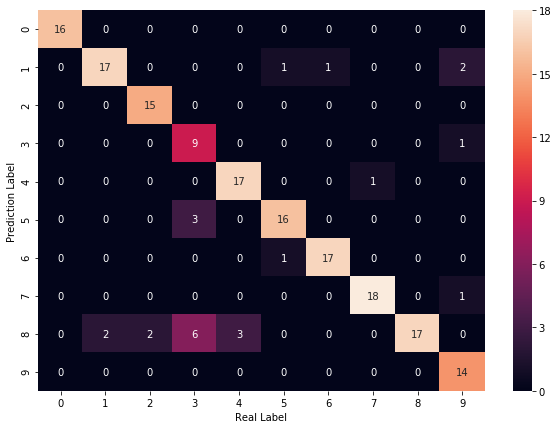

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [21]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [22]:
np.sum(list_P == digits.target[:1617])/1617

0.9659863945578231

In [23]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [24]:
np.mean(winner_fitness)

0.9906827547237441

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1052 Total connections::1596
